 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [ ]:
# Initial imports 
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [43]:
# Reading in the whale returns csv file
whale_returns = Path("Resources/whale_returns.csv")
whale_data_df = pd.read_csv(whale_returns,index_col="Date",infer_datetime_format = True,parse_dates = True)
whale_data_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [44]:
# Counting the amount of empty values 
whale_data_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [45]:
# Dropping the empty values
whale_data_df = whale_data_df.dropna() 
whale_data_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [46]:
# Reading in the algorithmic returns csv file
algo_returns = Path("Resources/algo_returns.csv")
algo_data_df = pd.read_csv(algo_returns,index_col="Date",infer_datetime_format = True,parse_dates = True)
algo_data_df



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [47]:
# Counting the empty values
algo_data_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [48]:
# Dropping the empty values 
algo_data_df.dropna(inplace = True)
algo_data_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [49]:
# Reading in the S&P 500 Closing Prices csv file
sp500_history = Path("Resources/sp500_history.csv")
sp500_data_df = pd.read_csv(sp500_history,index_col="Date",infer_datetime_format = True,parse_dates = True)
sp500_data_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [50]:
# Checking to see what Data Types are in the sp500 file
sp500_data_df.dtypes

Close    object
dtype: object

In [51]:
# Fix Data Types (converting the data types to float integers with no dollar signs)
sp500_data_df["Close"] = sp500_data_df["Close"].str.replace("$","", regex = False)
sp500_data_df["Close"]

sp500_data_df["Close"] = sp500_data_df["Close"].astype("float")
sp500_data_df["Close"]                                                      

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [52]:
# Calculating the Daily Returns of the sp500 data
sp500_data_df = sp500_data_df.pct_change()
sp500_data_df.head()

#whale_data_df = whale_data_df.pct_change()
#whale_data_df.head()

#algo_data_df = algo_data_df.pct_change()
#algo_data_df.head()


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [53]:
# Dropping empty values in the data frame
sp500_data_df.dropna(inplace = True)
sp500_data_df


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [54]:
# Renaming the `Close` Column in the sp500 data frame to "sp500"
sp500_data_df.rename(columns = {"Close":"sp500"},inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [55]:
# Joining the Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data_frame = pd.concat([whale_data_df,algo_data_df,sp500_data_df], axis = 'columns', join = 'inner')
combined_data_frame



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

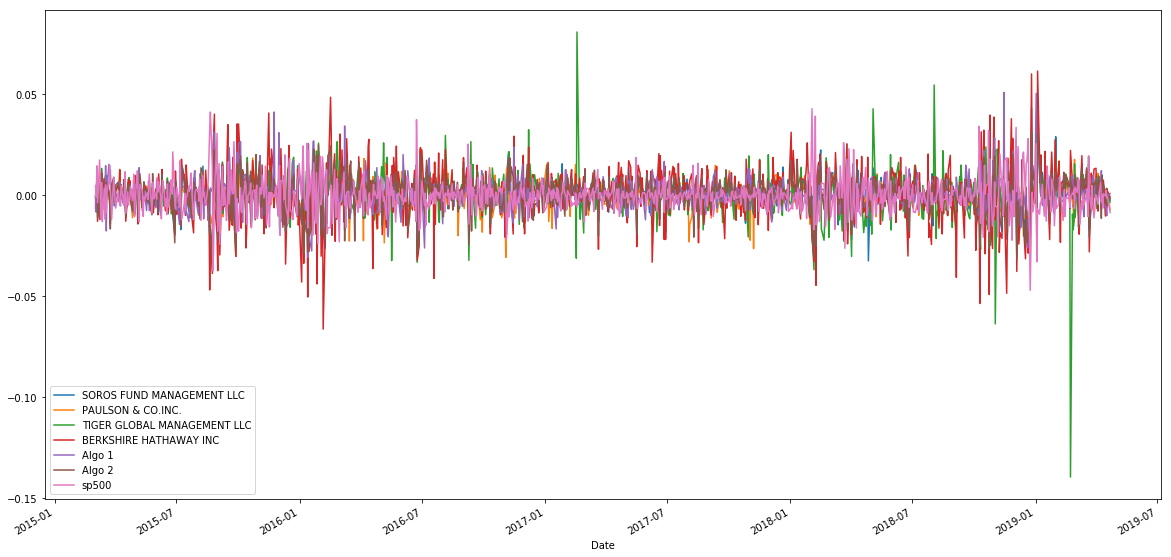

In [56]:
# Plotting the daily returns of all portfolios                                  
combined_data_frame.plot(figsize=(20, 10))





#### Calculate and Plot cumulative returns.

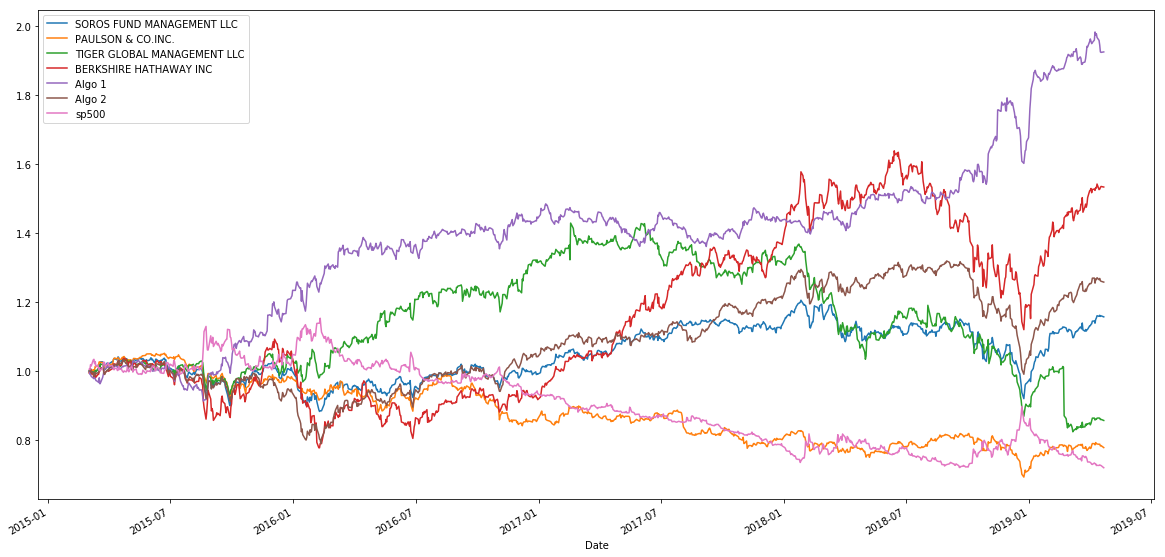

In [57]:
# Calculate cumulative returns of all the portfolios
combined_data_frame_cumulative_returns = (1 + combined_data_frame).cumprod() 
combined_data_frame_cumulative_returns.plot(figsize=(20, 10))



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


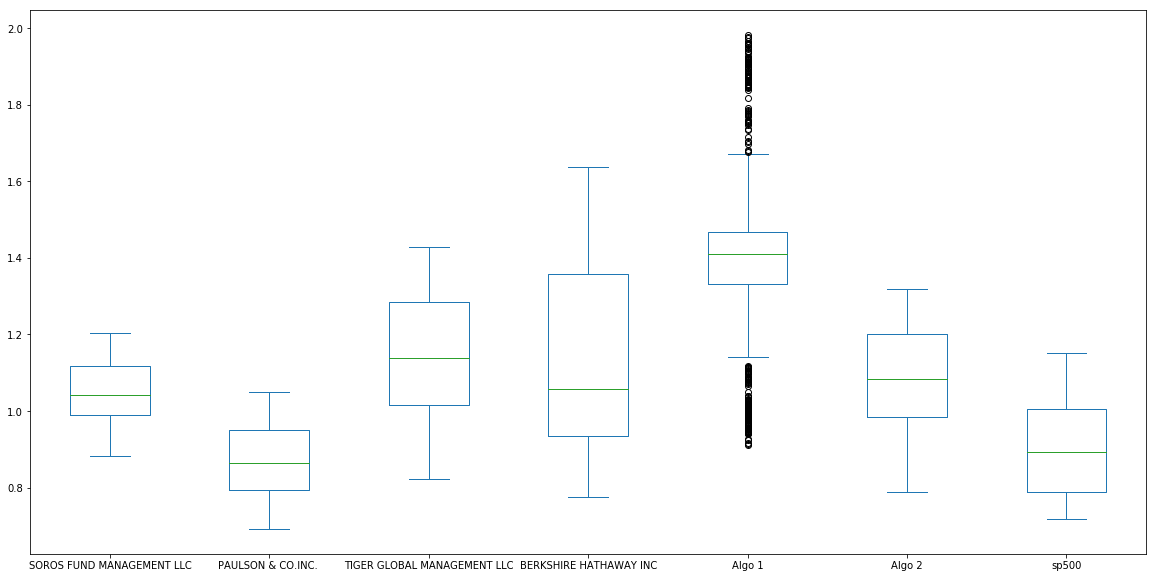

In [58]:
# Box plot to visually show risk
combined_data_frame_cumulative_returns.plot.box(figsize=(20, 10))



### Calculate Standard Deviations

In [59]:
# Calculate the daily standard deviations of all portfolios
combined_data_frame_daily_standard_deviation = combined_data_frame.std() 
combined_data_frame_daily_standard_deviation


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
sp500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [60]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_data_frame["sp500"].std()

# Determine which portfolios are riskier than the S&P 500
combined_data_frame_daily_standard_deviation > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized standard deviation (252 trading days)
sp500_std * np.sqrt(252)


0.1363126488377286

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

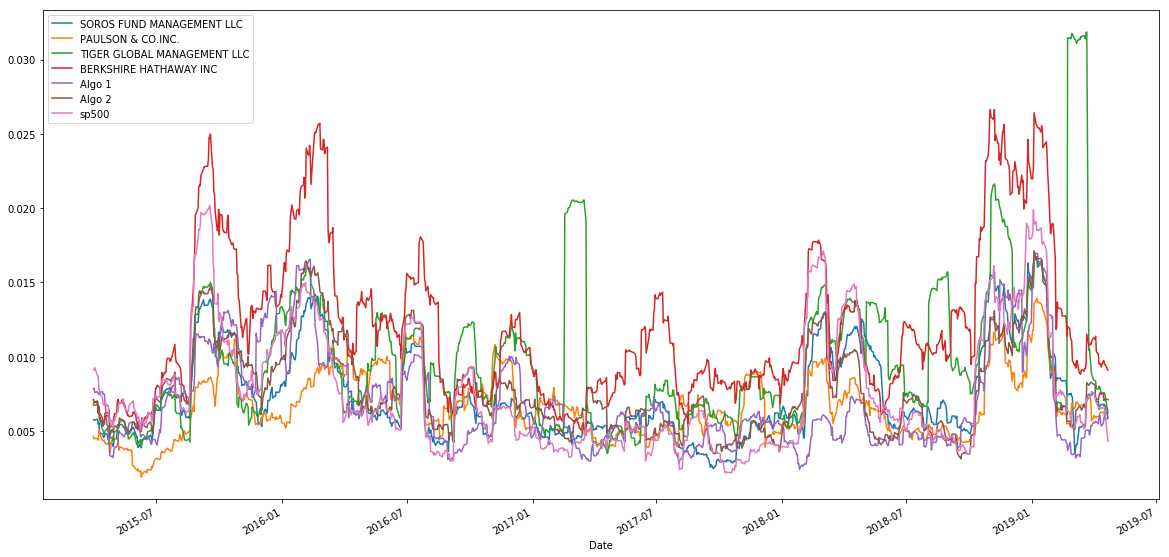

In [62]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_data_frame.rolling(window=21).std().plot(figsize=(20, 10))  




### Calculate and plot the correlation

In [63]:
# Calculate the correlation

combined_data_frame.corr()

# Displaying the correlation matrix below


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

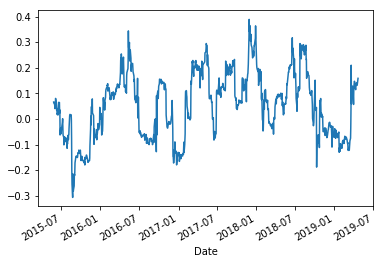

In [64]:
# Calculate covariance of a single portfolio
covariance = combined_data_frame["SOROS FUND MANAGEMENT LLC"].rolling(60).cov(combined_data_frame["sp500"])
covariance

# Calculate variance of S&P 500
variance = combined_data_frame["sp500"].rolling(60).var()
variance

# Computing beta
whale_data_df_beta = covariance / variance

# Plot beta trend
whale_data_df_beta.plot()

In [65]:
combined_data_frame["SOROS FUND MANAGEMENT LLC"]

Date
2015-03-03   -0.001266
2015-03-04    0.002230
2015-03-05    0.004016
2015-03-06   -0.007905
2015-03-09    0.000582
                ...   
2019-04-15   -0.001422
2019-04-16    0.002699
2019-04-17   -0.002897
2019-04-18    0.001448
2019-04-22   -0.002586
Name: SOROS FUND MANAGEMENT LLC, Length: 1042, dtype: float64

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

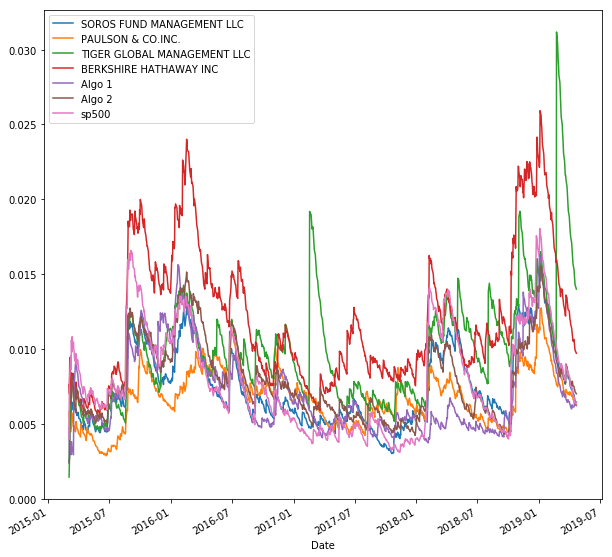

In [66]:
# Use `ewm` to calculate the rolling window
combined_data_frame.ewm(21).std().plot(figsize =(10,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Calculating and plotting the Annualized Sharpe Ratios
combined_data_frame_shapre =(combined_data_frame.mean() * 252 / (combined_data_frame.std() * np.sqrt(252)))
#combined_data_frame_shapre.plot.bar()


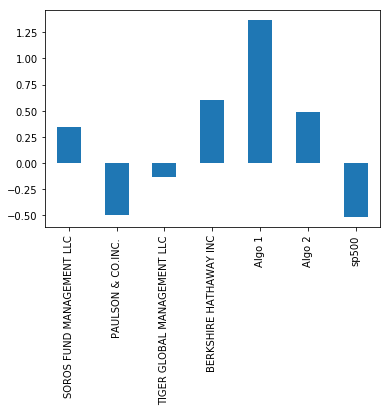

In [68]:
# Visualizing the sharpe ratios as a bar plot
combined_data_frame_shapre.plot.bar()



In [69]:
### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

###            Yes, it seems as though the Algorithmic strategies (Algo) outperform both the market (s&p 500) and the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [70]:
# Reading csv data from Facebook stock performance

fb_data = Path("Resources/fb_data.csv")
fb_data = pd.read_csv(fb_data,index_col="Date",infer_datetime_format = True,parse_dates = True)
fb_data.rename(columns = {"Close":"fb_data"},inplace = True)
fb_data



,fb_data
Date,
2012-10-01,21.99
2012-10-02,22.27
2012-10-03,21.83
2012-10-04,21.95
2012-10-05,20.91
...,...
2019-04-15,179.65
2019-04-16,178.87
2019-04-17,178.78


In [71]:
# Reading csv data from Autozone stock performance
az_data = Path("Resources/az_data.csv")
az_data = pd.read_csv(az_data,index_col="Date",infer_datetime_format = True,parse_dates = True)
az_data.rename(columns = {"Close":"az_data"},inplace = True)
az_data

,az_data
Date,
2012-10-01,369.07
2012-10-02,369.91
2012-10-03,372.14
2012-10-04,376.79
2012-10-05,381.29
...,...
2019-04-15,1064.59
2019-04-16,1061.59
2019-04-17,1051.37


In [72]:
# Reading csv data from Home Depot stock performance
hd_data = Path("Resources/hd_data.csv")
hd_data = pd.read_csv(hd_data,index_col="Date",infer_datetime_format = True,parse_dates = True)
hd_data.rename(columns = {"Close":"hd_data"},inplace = True)
hd_data

,hd_data
Date,
2012-10-01,60.57
2012-10-02,60.33
2012-10-03,61.77
2012-10-04,61.74
2012-10-05,63.20
...,...
2019-04-15,204.86
2019-04-16,204.47
2019-04-17,206.55


In [73]:
# Combining all stocks in a single DataFrame
combined_stock = pd.concat([fb_data,az_data,hd_data], axis = 'columns', join = 'inner')
combined_stock

,fb_data,az_data,hd_data
Date,,,
2012-10-01,21.99,369.07,60.57
2012-10-02,22.27,369.91,60.33
2012-10-03,21.83,372.14,61.77
2012-10-04,21.95,376.79,61.74
2012-10-05,20.91,381.29,63.20
...,...,...,...
2019-04-15,179.65,1064.59,204.86
2019-04-16,178.87,1061.59,204.47
2019-04-17,178.78,1051.37,206.55


In [74]:
# Resetting the Date index
combined_stock.reset_index(inplace = True)
combined_stock

,Date,fb_data,az_data,hd_data
0,2012-10-01,21.99,369.07,60.57
1,2012-10-02,22.27,369.91,60.33
2,2012-10-03,21.83,372.14,61.77
3,2012-10-04,21.95,376.79,61.74
4,2012-10-05,20.91,381.29,63.20
...,...,...,...,...
1643,2019-04-15,179.65,1064.59,204.86
1644,2019-04-16,178.87,1061.59,204.47
1645,2019-04-17,178.78,1051.37,206.55
1646,2019-04-18,178.28,1045.05,205.66


In [34]:
# Reorganize portfolio data by having a column per symbol
###     See above    ###

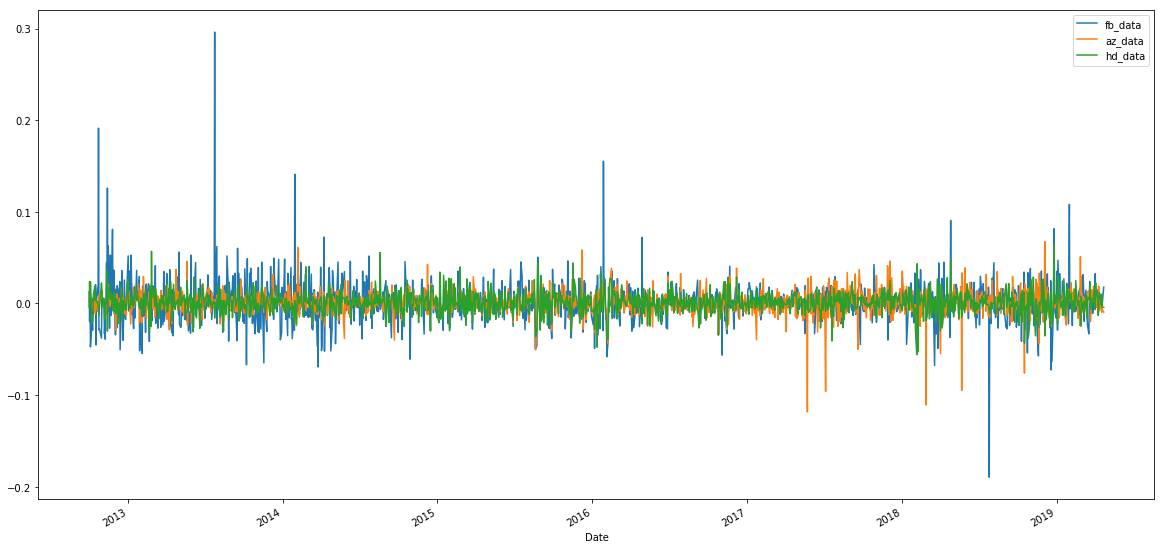

In [75]:
# Calculating the daily returns
fb_data_returns = fb_data.pct_change()
hd_data_returns = hd_data.pct_change()
az_data_returns = az_data.pct_change()

combined_stock_returns = pd.concat([fb_data_returns,az_data_returns,hd_data_returns], axis = 'columns', join = 'inner')

# Drop NAs
combined_stock_returns.dropna(inplace = True)
combined_stock_returns.plot(figsize =(20,10))



## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

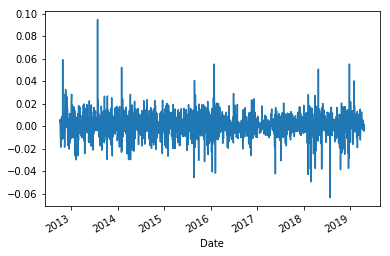

In [76]:
# Set weights
weights = (1/3, 1/3, 1/3)

# Calculate the portfolio return
combined_stock_weight = combined_stock_returns.dot(weights)
combined_stock_weight.plot()




## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [77]:
# Joining the combined_stock DataFrame to the combined_data_frame DataFrame
combined_data = pd.concat([whale_data_df,algo_data_df,sp500_data_df,fb_data,az_data,hd_data], axis = 'columns', join = 'inner')
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,fb_data,az_data,hd_data
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,79.60,651.90,116.07
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,80.90,652.48,114.76
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,81.21,650.97,115.91
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,80.01,645.20,114.45
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,79.44,650.89,115.25
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,179.65,1064.59,204.86
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,178.87,1061.59,204.47
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,178.78,1051.37,206.55


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
###     See above     ###


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [78]:
# Calculate the annualized `std`
combined_stock_std = combined_stock.std() 
combined_stock_std

combined_stock_annual_std = combined_stock_std * np.sqrt(252)
combined_stock_annual_std

Date       10957 days 13:37:53.591510656
fb_data                        817.51855
az_data                      2408.086421
hd_data                       674.967745
dtype: object

### Calculate and plot rolling `std` with 21-day window

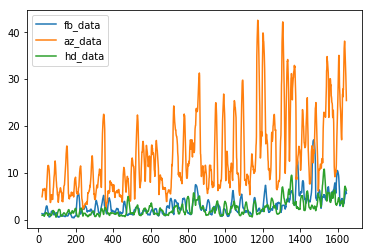

In [79]:
# Calculate and plotthe rolling standard deviation
combined_stock.rolling(window=21).std().plot() 




### Calculate and plot the correlation

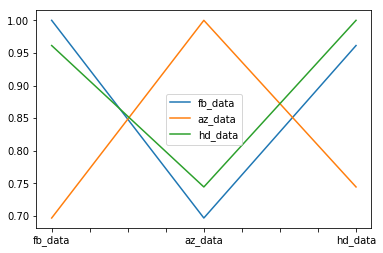

In [80]:
# Calculate and plot the correlation
combined_stock_corr = combined_stock.corr()
combined_stock_corr.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

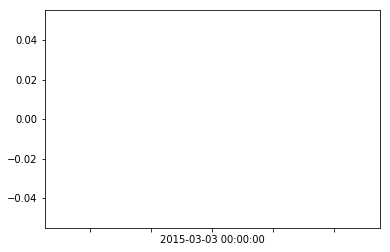

In [108]:
# Calculate and plot Beta
#Calculate the covariance
covariance_new = combined_stock["az_data"].rolling(60).cov(combined_data_frame["sp500"])

# Calculate the variance
variance = combined_stock["az_data"].rolling(60).var()
variance

# Computing beta
combined_stock_beta = covariance_new / variance
combined_stock_beta.plot()

                              




### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

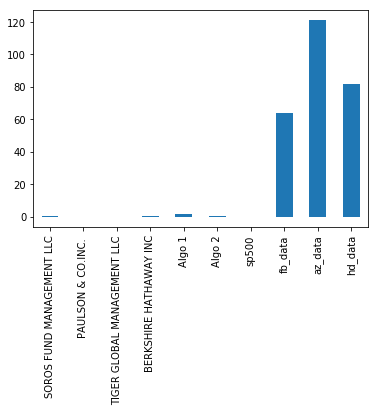

In [109]:
# Calculate Annualized Sharpe Ratios
combined_stock_sharpe =(combined_data.mean() * 252 / (combined_data.std() * np.sqrt(252)))
combined_stock_sharpe.plot.bar()



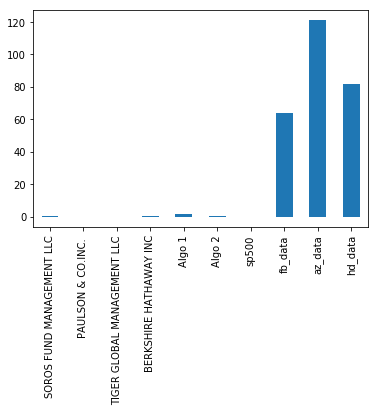

In [110]:
# Visualize the sharpe ratios as a bar plot
combined_stock_sharpe.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
###    my portfolio exceedes the previous portfolio.